In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.utils.np_utils import to_categorical
from cv2 import _InputArray_STD_ARRAY
from keras import Sequential
from keras.layers import Bidirectional,LSTM,Conv2D,pooling,MaxPool2D,Flatten,Dense,Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix

In [32]:
def load_data(dir_path):
    df=pd.DataFrame()
    x=[]
    y=[]
    i=0
    for path in os.listdir(dir_path):
        for image in os.listdir(str(dir_path+'/'+path)):
            img=cv2.imread(dir_path+'/'+path+'/'+image)
            img=cv2.resize(img, (90,90))
            x.append(img)
            y.append(i)
        i=i+1
    # x=np.array(x)
    # y=np.array(y)
    df['img']=x
    df['label']=y
    df=df.sample(frac=1)
    x=np.array(list(df.img))
    y=np.array(list(df['label']))
    return x,y
x_train,y_train=load_data("Training")

In [33]:
x_train.shape

(28273, 90, 90, 3)

In [34]:
np.save("Images",x_train[:400,:])

In [35]:
labels={0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Suprise'}

In [36]:
x_train.shape
# y_train.shape

(28273, 90, 90, 3)

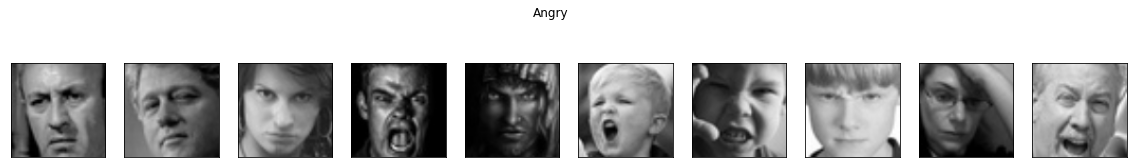

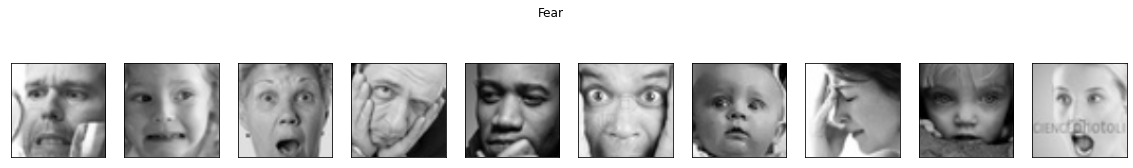

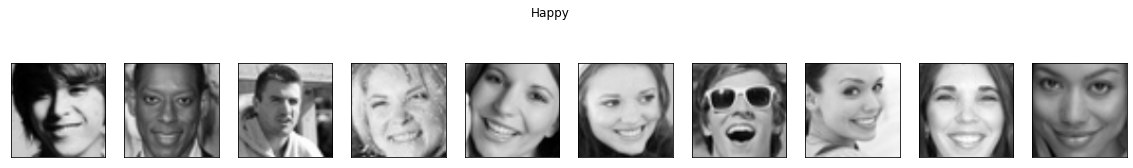

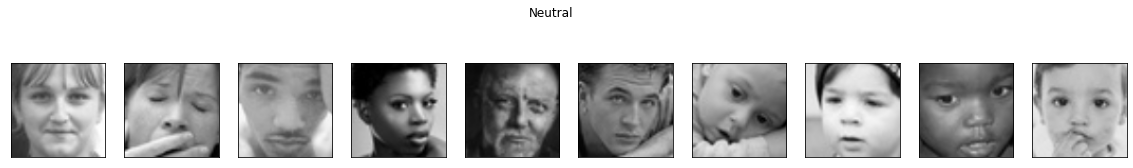

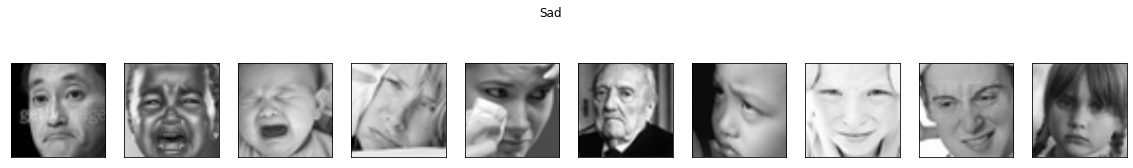

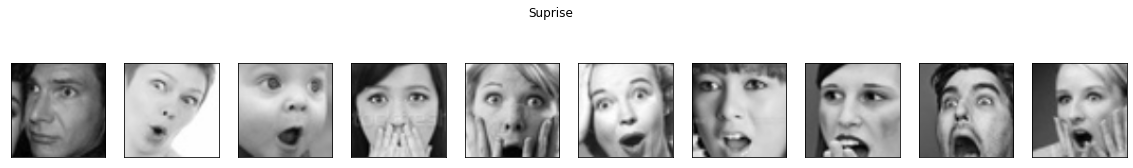

In [37]:
def show_images(x,y,labels,n=10):
    for label in np.unique(y):
        images=x[np.argwhere(label==y)][:n]
        rows=int(n/10)
        j=1
        plt.figure(figsize=(20,3))
        plt.suptitle(labels[label])
        for img in images:
            plt.subplot(rows,10,j)
            plt.imshow(img[0])
            plt.xticks([])
            plt.yticks([])
            j+=1
        plt.show()

show_images(x_train,y_train,labels)

In [38]:

def category_generator(x):
    x=to_categorical(x,num_classes=6)
    return x

In [39]:
y_train=category_generator(y_train)
y_train.shape

(28273, 6)

In [60]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model

model=InceptionV3(input_shape=(90,90,3),include_top=False,weights="imagenet")
x=layers.Flatten()(model.output)
x=layers.Dense(1024,activation="relu")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(6,activation="sigmoid")(x)

model=Model(model.input,x)
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])

model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 90, 90, 3)]  0           []                               
                                                                                                  
 conv2d_1040 (Conv2D)           (None, 44, 44, 32)   864         ['input_12[0][0]']               
                                                                                                  
 batch_normalization_1034 (Batc  (None, 44, 44, 32)  96          ['conv2d_1040[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1034 (Activation)   (None, 44, 44, 32)   0           ['batch_normalization_1034[

In [10]:

# def create_model():
#     model=Sequential()
#     model.add(Conv2D(32,(3,3),activation='relu',input_shape=[48,48,3],padding='same'))
#     model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
#     model.add(MaxPool2D(2,2))
#     model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
#     model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
#     model.add(MaxPool2D(2,2))
#     model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
#     # model.add(MaxPool2D(2,2))
#     # model.add(Conv2D(256,(3,3),activation='relu'))
#     # model.add(Conv2D(256,(3,3),activation='relu'))
#     # model.add(MaxPool2D(2,2))
#     # model.add(Conv2D(512,(3,3),activation='relu'))
#     # model.add(Conv2D(512,(3,3),activation='relu'))
#     # model.add(MaxPool2D(2,2))
    
#     model.add(Flatten())
#     model.add(Dense(5000, activation="relu"))
#     model.add(Dropout(0.6))
#     model.add(Dense(6, activation="softmax"))
#     model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])
#     return model


In [11]:
# model=create_model()
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

In [69]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.fit(np.array(x_train), np.array(y_train), epochs=10, batch_size=64,callbacks=[es])

Epoch 1/10
442/442 [==============================] - 668s 2s/step - loss: 1.1503 - accuracy: 0.5610
Epoch 2/10
442/442 [==============================] - 695s 2s/step - loss: 0.9123 - accuracy: 0.6574
Epoch 3/10
442/442 [==============================] - 701s 2s/step - loss: 0.7025 - accuracy: 0.7454
Epoch 4/10
442/442 [==============================] - 713s 2s/step - loss: 0.5289 - accuracy: 0.8093
Epoch 5/10
442/442 [==============================] - 697s 2s/step - loss: 0.3962 - accuracy: 0.8590
Epoch 6/10
442/442 [==============================] - 653s 1s/step - loss: 0.3017 - accuracy: 0.8943
Epoch 7/10
442/442 [==============================] - 646s 1s/step - loss: 0.2346 - accuracy: 0.9199
Epoch 8/10
442/442 [==============================] - 687s 2s/step - loss: 0.2081 - accuracy: 0.9284
Epoch 9/10
442/442 [==============================] - 678s 2s/step - loss: 0.1815 - accuracy: 0.9376
Epoch 10/10
442/442 [==============================] - 676s 2s/step - loss: 0.1489 - accura

In [77]:
x_test,y_test=load_data("Testing")

In [78]:
pred=model.predict(x_test)

221/221 [==============================] - 26s 116ms/step


In [79]:
pred=[np.argmax(i) for i in pred]
print(np.unique(pred))

[0 1 2 3 4 5]


In [83]:
print("Accuracy Score on test set---> ",accuracy_score(pred,y_test))

Accuracy Score on test set--->  0.6149709919343427


In [86]:
def plot_confusion_matrix(y_test,pred,labels):
    fig,ax=plt.subplots(figsize=(10,10))
    disp=ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=list(labels.items()))
    disp.plot(ax=ax)
    plt.show()


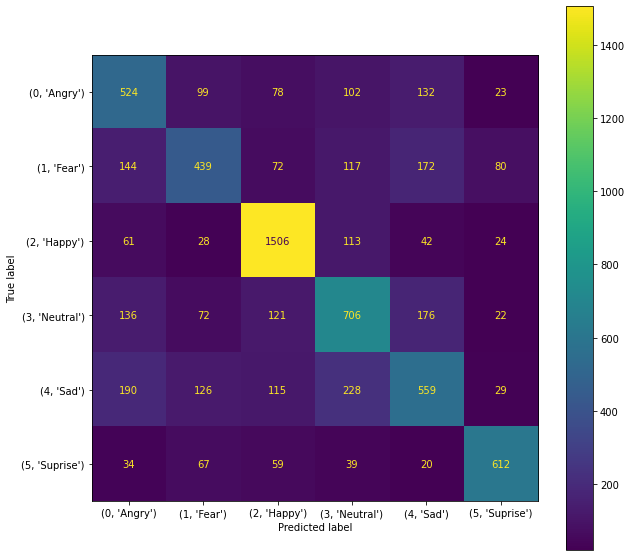

In [87]:
plot_confusion_matrix(y_test,pred,labels)

In [88]:
model.save("facial_recognition_model.h5")

In [21]:
# from keras.models import load_model
# t=load_model("facial_recognition_model.h5")

In [93]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm



from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dropout, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainAug = ImageDataGenerator(rotation_range=15,
                              zoom_range=0.15,
                              #width_shift_range=0.2,
                              brightness_range=(.6, 1.2),
                              shear_range=.15,
                              #height_shift_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest")

In [97]:
def build_model():
    """
    Create the new model.
  
    This function loads a pre-trained EfficientNetB0 model on Imagenet,
    adds an Input layer at the beggining, and 3 more layers at the end
    (i.e GlobalAveragePooling2D, Dropout, Dense).
    Args:
        No value
   
    Returns:
        model (tensorflow.python.keras.engine.functional.Functional): The compiled model
    """
    
    inputs = Input(shape=(90, 90, 3))
    base_model = EfficientNetB0(include_top=False, weights='imagenet',
                                drop_connect_rate=0.33, input_tensor=inputs)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(.5, name="top_dropout")(x)
    outputs = Dense(6, activation='softmax')(x)
    model = Model(inputs, outputs)

    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [98]:
EPOCHS = 1
batch_size = 64
filepath = "weights.best.hdf5"

# Define the necessary callbacks
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
earlystopping = EarlyStopping(monitor='val_accuracy', patience=15, verbose=1, mode='auto', restore_best_weights=True)
rlrop = ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-6, verbose=1)

callbacks = [checkpoint, earlystopping, rlrop]

print(f"[INFO] training network for {EPOCHS} epochs...\n")
hist = model.fit(trainAug.flow(x_train, y_train, batch_size=batch_size),
                 steps_per_epoch=len(x_train) // batch_size,
                 validation_data=(x_test, y_test),
                 epochs=EPOCHS, callbacks=callbacks)

[INFO] training network for 1 epochs...

441/441 [==============================] - ETA: 0s - loss: 0.9652 - accuracy: 0.6527

ValueError: in user code:

    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\welcome\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


In [99]:
pred=model.predict(x_test)
pred=[np.argmax(i) for i in pred]
print(np.unique(pred))
print("Accuracy Score on test set---> ",accuracy_score(pred,y_test))

221/221 [==============================] - 38s 171ms/step
[0 1 2 3 4 5]
Accuracy Score on test set--->  0.6285552568275081
